# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Data scaling with StandardScaler()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid_search = GridSearchCV(logistic_regression_model, param_grid = {'C': np.linspace(0.05, 0.1, 10)})

grid_search.fit(X_train, y_train)

print("best score is", grid_search.best_score_)
print("best params is", grid_search.best_params_)

# Find parameters with gridsearch

best score is 0.7450542118432026
best params is {'C': 0.09444444444444444}


In [8]:
from sklearn.metrics import accuracy_score, f1_score

best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train, y_train)

prediction_train = best_estimator.predict(X_train)
prediction_test = best_estimator.predict(X_test)

print("f1 score: ", f1_score(y_test, prediction_test, average = 'macro')) 
print("accuracy test:", accuracy_score(y_test, prediction_test)) 

# Fit our best estimator and take a look at metrics

f1 score:  0.7303916194422287
accuracy test: 0.7407407407407407


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

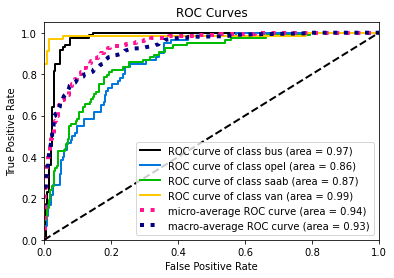

In [9]:
from scikitplot import metrics
metrics.plot_roc(y_test, best_estimator.predict_proba(X_test))

# Plot ROC-curves for trained model

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [10]:
from sklearn.decomposition import PCA
principal_component_analysis_model = PCA()
principal_component_analysis_model.fit(X_train)

# Fit principal component analysis model

PCA()

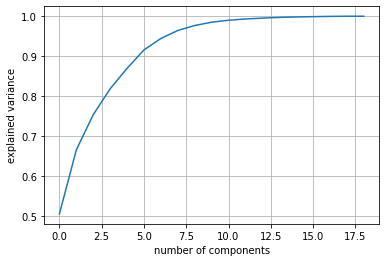

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(principal_component_analysis_model.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('explained variance');

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

I selected 12 components because it's enough to describe 99% of data. Data should be normalized as well, in other case PCA will prefer components with biggest range of values. 

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [12]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

In [13]:
principal_component_analysis_model = PCA(n_components = 12)
X_train_pca = principal_component_analysis_model.fit_transform(X_train)
X_test_pca = principal_component_analysis_model.transform(X_test)
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid_search = GridSearchCV(logistic_regression_model, param_grid = {'C': np.linspace(0.05, 0.1, 10)})

grid_search.fit(X_train_pca, y_train)

print("best score is", grid_search.best_score_)
print("best params is", grid_search.best_params_)

best score is 0.715929941618015
best params is {'C': 0.05}


In [14]:
from sklearn.metrics import accuracy_score, f1_score

best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train_pca, y_train)

prediction_train = best_estimator.predict(X_train_pca)
prediction_test = best_estimator.predict(X_test_pca)

print("f1 score: ", f1_score(y_test, prediction_test, average = 'macro')) 
print("accuracy:", accuracy_score(y_test, prediction_test)) 

# Fit our best estimator and take a look at metrics
# As we see, quality become little bit lower, as expected, but the model is easier

f1 score:  0.7114978489838976
accuracy: 0.7239057239057239


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

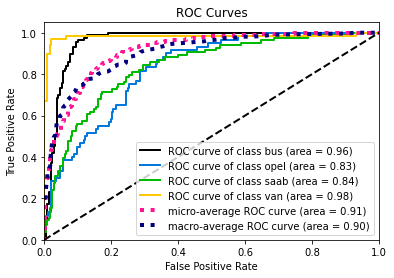

In [15]:
metrics.plot_roc(y_test, best_estimator.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_model, {"max_depth": np.arange(1, 30)})
grid_search.fit(X_train_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
prediction = grid_search.best_estimator_.predict(X_test_pca)
print('accuracy: ', accuracy_score(prediction, y_test))
print('f1 score: ', f1_score(prediction, y_test, average='macro'))

accuracy:  0.5723905723905723
f1 score:  0.5801759531572962


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [18]:
from sklearn.ensemble import BaggingClassifier
import sklearn

In [19]:
# Utility function for generating, evaluating and plotting models

alghorithms_range = np.arange(2, 100, 5)

def generate(model):
    models = dict()
    for alghorithm_number in alghorithms_range:
        models[alghorithm_number] = BaggingClassifier(base_estimator = model, n_estimators = alghorithm_number)
        models[alghorithm_number].fit(X_train, y_train)
    return models

def evaluate(model):
    prediction = model.predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    f1_score_ = f1_score(prediction, y_test, average='macro')
    return accuracy, f1_score_

def plot(models):
    f1_array = []
    accuracy_array = []
        
    for name, model in models.items():
        accuracy, f1_score = evaluate(model)
        accuracy_array.append(accuracy)
        f1_array.append(f1_score)
    plt.plot(alghorithms_range, f1_array)
    plt.grid()
    plt.xlabel("alghorithm number")
    plt.ylabel("f1 score")
    plt.show()
    
    plt.plot(alghorithms_range, accuracy_array)
    plt.grid()
    plt.xlabel("alghorithm number")
    plt.ylabel("accuracy")
    plt.show()

In [20]:
# Logistic regression
import warnings
warnings.filterwarnings('ignore')

base_model = LogisticRegression(solver = 'saga', tol = 1e-3, max_iter = 500, random_state = 42)
logistic_regression_models = generate(base_model)

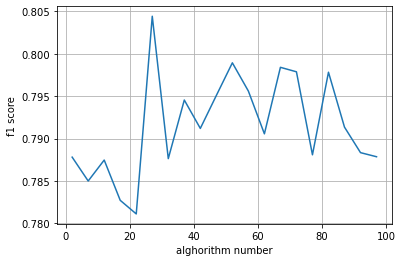

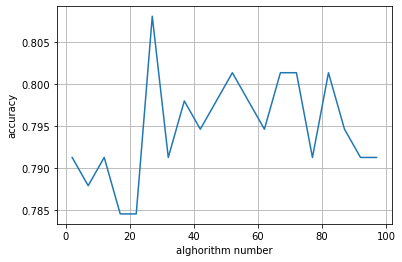

In [21]:
plot(logistic_regression_models)

Optimal number of alghorithms for linear regression is around 22

In [22]:
# Decision tree
base_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
decision_tree_models = generate(base_model)

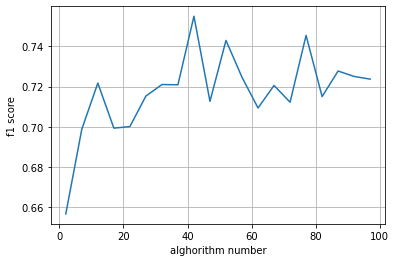

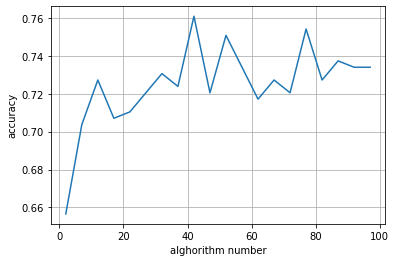

In [23]:
plot(decision_tree_models)

Optimal number of alghorithms for decision trees is around 28

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Random forest
f1_array = []
accuracy_array = []
number_of_trees = range(1, 51)
for i in number_of_trees:
    random_forest_model = RandomForestClassifier(n_estimators=i)
    random_forest_model.fit(X_train, y_train)
    prediction = random_forest_model.predict(X_test)
    f1_array.append(sklearn.metrics.f1_score(y_test, prediction, average='macro'))
    accuracy_array.append(sklearn.metrics.accuracy_score(y_test, prediction))

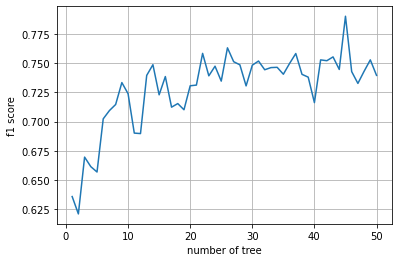

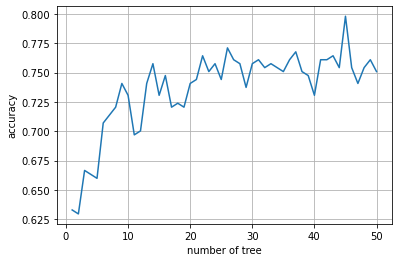

In [26]:
plt.plot(number_of_trees, f1_array)
plt.grid()
plt.xlabel('number of tree')
plt.ylabel('f1 score')
plt.show()

plt.plot(number_of_trees, accuracy_array)
plt.grid()
plt.xlabel('number of tree')
plt.ylabel('accuracy')
plt.show()

Plot shows that optimal number of tree is 20

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

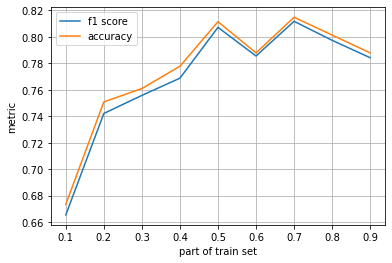

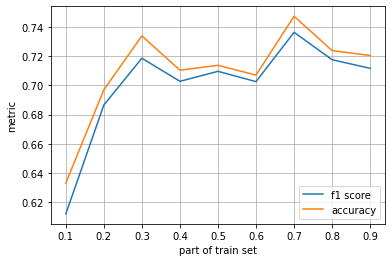

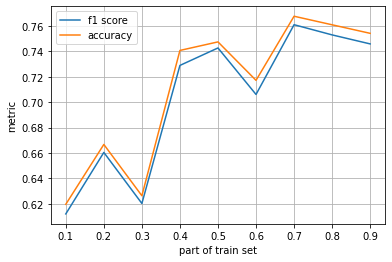

In [27]:
import warnings
warnings.filterwarnings('ignore')

X_train_split = []
y_train_split = []

for i in range(1, 10):
    X_train_split.append(X_train[0: int(0.1 * len(X_train) + 1) * i])
    y_train_split.append(y_train[0: int(0.1 * len(X_train) + 1) * i])

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
decision_tree_model = DecisionTreeClassifier(max_depth=15)
random_forest_model = RandomForestClassifier(n_estimators=20)

models = [BaggingClassifier(logistic_regression_model, n_estimators = 22),
          BaggingClassifier(decision_tree_model, n_estimators = 28),
          random_forest_model]
    
for model in models:
    f1_array = []
    accuracy_array = []
    for i in range(0, 9):
        model.fit(X_train_split[i], y_train_split[i])
        f1 = sklearn.metrics.f1_score(y_test, model.predict(X_test), average='macro')
        accuracy = sklearn.metrics.accuracy_score(y_test, model.predict(X_test))
        f1_array.append(f1)
        accuracy_array.append(accuracy)
    
    plt.plot(np.linspace(0.1, 0.9, 9), f1_array, label="f1 score")
    plt.grid()
    plt.xlabel('part of train set')
    plt.ylabel('metric')
    plt.plot(np.linspace(0.1, 0.9, 9), accuracy_array, label="accuracy")
    plt.xlabel('part of train set')
    plt.ylabel('metric')
    plt.legend()
    plt.show()

As it was expected, increasing the train size is good for quality of any model. But I'm surprised that logistic regression model shows better accuracy on full train. I expected that tree would work better.